# ORANGE VS GRAPE
fun and simple Machine Learning exercise to build classifier model for citrus data (orange vs grape)

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### THE DATASET
dataset uploaded by Josh on kaggle: https://www.kaggle.com/joshmcadams/oranges-vs-grapefruit which he mentioned was fictional dataset.

### Objective
to classify orange and grapefruit.

## TABLE OF CONTENT
- LOAD DATA
- PREPROCESSING
- EDA
- TRAIN-TEST SPLIT
- MODEL BUILDING
- MODEL COMPARISION


# LOAD DATA
load data, check null and data types

In [2]:
def load_data():
    df = pd.read_csv('dataset/citrus.csv')
    return df

In [3]:
df = load_data()
df.head()

,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      10000 non-null  object 
 1   diameter  10000 non-null  float64
 2   weight    10000 non-null  float64
 3   red       10000 non-null  int64  
 4   green     10000 non-null  int64  
 5   blue      10000 non-null  int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 468.9+ KB


# EDA

check data count for both target (orange and grape)

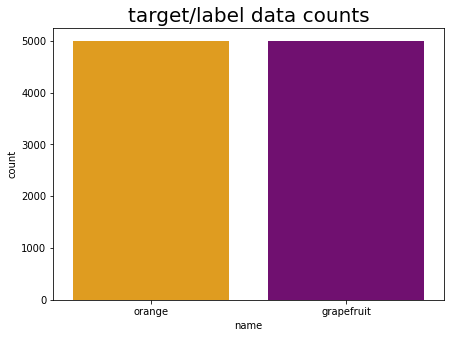

In [5]:
colour = ['orange', 'purple']
fig = plt.figure(figsize=(7, 5))
fig.set_facecolor('white')

ax = sns.countplot(data = df, x='name', palette=colour)
ax.set_title('target/label data counts', fontsize=20)
plt.show()

orange and purple data has the same amount (balanced)

plot feature diameter & weight

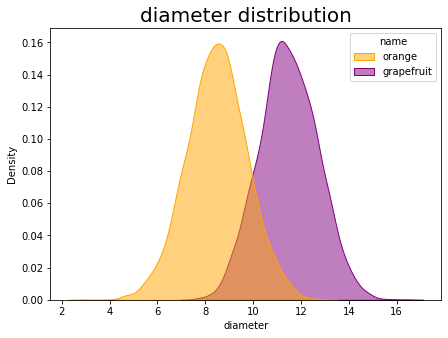

In [6]:
fig = plt.figure(figsize=(7, 5))
fig.set_facecolor('white')

ax = sns.kdeplot(data = df, x = 'diameter', hue='name', palette=colour, shade=True, alpha=0.5)
ax.set_title('diameter distribution', fontsize=20)
plt.show()

grapefruit averagely have bigger diameter than orange

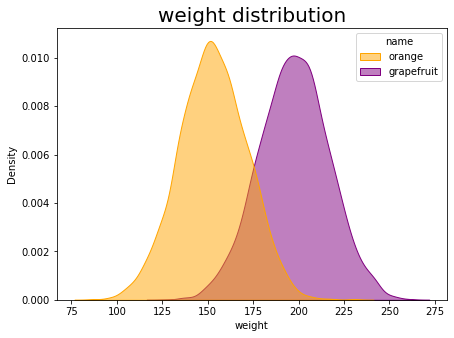

In [7]:
fig = plt.figure(figsize=(7, 5))
fig.set_facecolor('white')

ax = sns.kdeplot(data = df, x = 'weight', hue='name', palette=colour, shade=True, alpha=0.5)
ax.set_title('weight distribution', fontsize=20)
plt.show()

grapefruit averagely weight more than orange

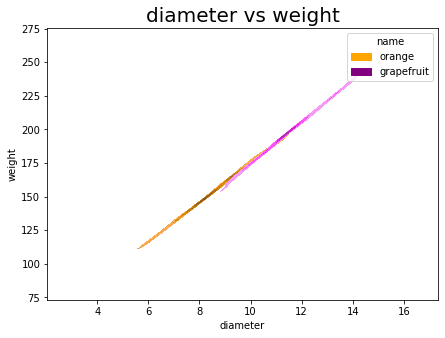

In [8]:
fig = plt.figure(figsize=(7, 5))
fig.set_facecolor('white')

ax = sns.kdeplot(data=df, x='diameter', y='weight', hue='name', fill=True, levels=5, palette=colour)
ax.set_title('diameter vs weight', fontsize=20)
plt.show()

plot color (rgb)

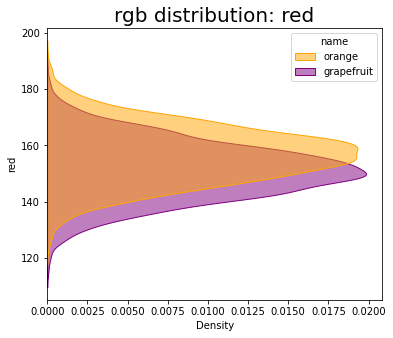

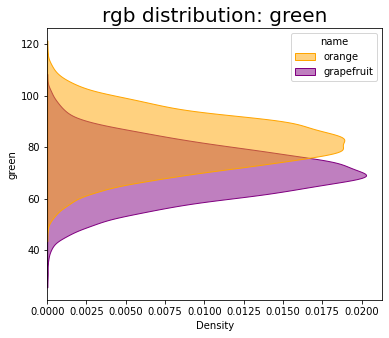

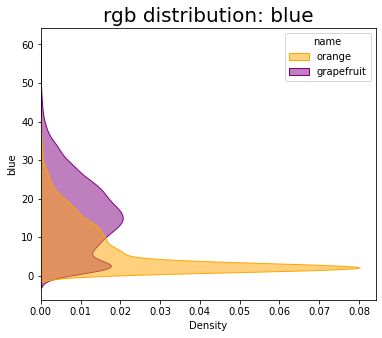

In [9]:
col = ['red', 'green', 'blue']
for i in col:
    fig = plt.figure(figsize=(6, 5))
    fig.set_facecolor('white')

    ax = sns.kdeplot(data = df, y = i, hue='name', palette=colour, shade=True, alpha=0.5)
    ax.set_title('rgb distribution: ' + i , fontsize=20)
    plt.show()

# PREPROCESSING

## ENCODING

In [10]:
# encode target column (name)
df['name'].replace(to_replace='orange', value=1, inplace=True)
df['name'].replace(to_replace='grapefruit', value=0, inplace=True)

In [11]:
df.head()

,name,diameter,weight,red,green,blue
0,1,2.96,86.76,172,85,2
1,1,3.91,88.05,166,78,3
2,1,4.42,95.17,156,81,2
3,1,4.47,95.60,163,81,4
4,1,4.48,95.76,161,72,9


## X and Y split (feature and target)

In [12]:
y = df.name
x = df.drop('name', axis=1)

## SCALING

In [13]:
# scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x.head()

,diameter,weight,red,green,blue
0,0.000000,0.000000,0.740260,0.635294,0.000000
1,0.070423,0.007382,0.662338,0.552941,0.018519
2,0.108228,0.048126,0.532468,0.588235,0.000000
3,0.111935,0.050587,0.623377,0.588235,0.037037
4,0.112676,0.051502,0.597403,0.482353,0.129630


In [14]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: name, dtype: int64

# TRAIN TEST SPLIT (7:3)

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=0)

# MODEL BUILDING

In [16]:
models = []
accuracies = []

## 1. LOGISTIC REGRESSION

In [17]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
model = logreg.fit(x_train, y_train)
# predict
y_pred = model.predict(x_test)
# check accuracy
from sklearn import metrics
acc = metrics.accuracy_score(y_test, y_pred)
print(acc)
# classification report 
rep = metrics.classification_report(y_test, y_pred)
print(rep)
# confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

models.append('Logistic Regression')
accuracies.append(acc)

0.9243333333333333
              precision    recall  f1-score   support

           0       0.92      0.93      0.92      1489
           1       0.93      0.92      0.92      1511

    accuracy                           0.92      3000
   macro avg       0.92      0.92      0.92      3000
weighted avg       0.92      0.92      0.92      3000

[[1380  109]
 [ 118 1393]]


## 2. DECISION TREE

In [18]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
model = dt.fit(x_train, y_train)
# predict
y_pred = model.predict(x_test)
# check accuracy
acc = metrics.accuracy_score(y_test, y_pred)
print(acc)
# classification report 
rep = metrics.classification_report(y_test, y_pred)
print(rep)
# confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

models.append('Decision Tree')
accuracies.append(acc)

0.923
              precision    recall  f1-score   support

           0       0.92      0.93      0.92      1489
           1       0.93      0.92      0.92      1511

    accuracy                           0.92      3000
   macro avg       0.92      0.92      0.92      3000
weighted avg       0.92      0.92      0.92      3000

[[1384  105]
 [ 126 1385]]


## 3. SUPPORT VECTOR MACHINE (SVM)

In [19]:
from sklearn import svm
svm = svm.SVC()
model = svm.fit(x_train, y_train)
# predict
y_pred = model.predict(x_test)
# check accuracy
acc = metrics.accuracy_score(y_test, y_pred)
print(acc)
# classification report 
rep = metrics.classification_report(y_test, y_pred)
print(rep)
# confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

models.append('SVM')
accuracies.append(acc)

0.931
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      1489
           1       0.94      0.92      0.93      1511

    accuracy                           0.93      3000
   macro avg       0.93      0.93      0.93      3000
weighted avg       0.93      0.93      0.93      3000

[[1399   90]
 [ 117 1394]]


## 4. K-Nearest Neighbors (KNN)

In [20]:
# elbow method / find best k
from sklearn.neighbors import KNeighborsClassifier
error = []
for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i, metric='euclidean')
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    error.append(np.mean(y_pred != y_test))

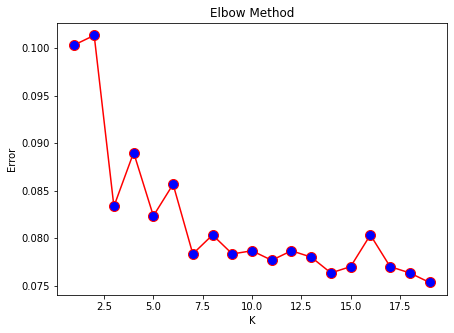

In [21]:
# plot knn error
fig = plt.figure(figsize=(7, 5))  
fig.set_facecolor('white')

plt.plot(range(1, 20), error, color='r', marker='o', markerfacecolor='b', markersize=10)

plt.title('Elbow Method')
plt.xlabel('K')
plt.ylabel('Error')
plt.show()


best k = 9 or 16

In [22]:
knn = KNeighborsClassifier(n_neighbors=9, metric='euclidean')
model = knn.fit(x_train, y_train)
# predict
y_pred = model.predict(x_test)
# check accuracy
acc = metrics.accuracy_score(y_test, y_pred)
print(acc)
# classification report 
rep = metrics.classification_report(y_test, y_pred)
print(rep)
# confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

models.append('KNN, k=9')
accuracies.append(acc)

0.9216666666666666
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      1489
           1       0.93      0.91      0.92      1511

    accuracy                           0.92      3000
   macro avg       0.92      0.92      0.92      3000
weighted avg       0.92      0.92      0.92      3000

[[1383  106]
 [ 129 1382]]


In [23]:
knn = KNeighborsClassifier(n_neighbors=16, metric='euclidean')
model = knn.fit(x_train, y_train)
# predict
y_pred = model.predict(x_test)
# check accuracy
acc = metrics.accuracy_score(y_test, y_pred)
print(acc)
# classification report 
rep = metrics.classification_report(y_test, y_pred)
print(rep)
# confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

models.append('KNN, k=16')
accuracies.append(acc)

0.9196666666666666
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      1489
           1       0.93      0.91      0.92      1511

    accuracy                           0.92      3000
   macro avg       0.92      0.92      0.92      3000
weighted avg       0.92      0.92      0.92      3000

[[1390   99]
 [ 142 1369]]


## 5. XG BOOST

In [24]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from xgboost import XGBClassifier
xgb = XGBClassifier(eval_metric='mlogloss')
model = xgb.fit(x_train, y_train)
# predict
y_pred = model.predict(x_test)
# check accuracy
acc = metrics.accuracy_score(y_test, y_pred)
print(acc)
# classification report 
rep = metrics.classification_report(y_test, y_pred)
print(rep)
# confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

models.append('XG Boost')
accuracies.append(acc)

0.9856666666666667
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1489
           1       0.99      0.98      0.99      1511

    accuracy                           0.99      3000
   macro avg       0.99      0.99      0.99      3000
weighted avg       0.99      0.99      0.99      3000

[[1478   11]
 [  32 1479]]


## 6. RANDOM FOREST

In [25]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
model = rf.fit(x_train, y_train)
# predict
y_pred = model.predict(x_test)
# check accuracy
acc = metrics.accuracy_score(y_test, y_pred)
print(acc)
# classification report 
rep = metrics.classification_report(y_test, y_pred)
print(rep)
# confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

models.append('Random Forest')
accuracies.append(acc)

0.9456666666666667
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      1489
           1       0.96      0.93      0.95      1511

    accuracy                           0.95      3000
   macro avg       0.95      0.95      0.95      3000
weighted avg       0.95      0.95      0.95      3000

[[1426   63]
 [ 100 1411]]


# MODEL COMPARISION

In [26]:
df_model = pd.DataFrame(list(zip(models, accuracies)), columns=['model', 'acc'])
df_model = df_model.sort_values(by='acc', ascending=False)

In [27]:
print(df_model)

                 model       acc
5             XG Boost  0.985667
6        Random Forest  0.945667
2                  SVM  0.931000
0  Logistic Regression  0.924333
1        Decision Tree  0.923000
3             KNN, k=9  0.921667
4            KNN, k=16  0.919667


accuracy ranged from 91.9% to 98.5%